## Allgemeine Vorarbeiten
Zu Beginn werden Pakete in der virtuellen Umgebung installiert, die benötigt werden. Beispielsweise "pandas" über den Befehl "%pip install pandas". Anschließend werden in einer separaten Zelle die benötigten Module importiert.

In [ ]:
# Install basic packages if not already installed
%pip install pandas
%pip install numpy
%pip install matplotlib

In [2]:
# Import necessary modules
import importlib
import math
import sys
# go up one directory to import local modules as VDP_functions and VDP_constants are not in the same directory as the notebook
sys.path.append('../')  
# VDP_functions contains all the functions used throughout the notebook
import VDP_functions as vdp
# VDP_constants contains all the constants used throughout the notebook
import VDP_constants as vdp_const
importlib.reload(vdp)

<module 'VDP_functions' from 'e:\\Bitbucket_Repo_GIT\\python\\VDP\\exercises_virt_env\\..\\VDP_functions.py'>

## Blatt 2
Für die Aufgabenteile
1. vollständige Abschirmung, d.h. `shield_ind = 1`
2. keine Abschirmung, d.h. `shield_ind = 0`

In [3]:
# Initial energy in MeV
E0 = 1000
Z = 21 # Atomic number of Scandium
# Atomic mass of Scandium
A = 43
rho = 1.95*10**-3  # g/cm^3

# Exercise part a) complete shielding
print('Aufgabenteil a) ' "%1.3f"% vdp.dE_dx(E0, Z, A, rho, 1) + " MeV/cm")
# Exercise part b) no shielding
print('Aufgabenteil b) ' "%1.3f"% vdp.dE_dx(E0, Z, A, rho, 0) + " MeV/cm")

Aufgabenteil a) 0.118 MeV/cm
Aufgabenteil b) 0.221 MeV/cm


Aufgabenteil c): Die Voraussetzung der Formel muss geprüft werden, d.h. $E_0 >> 137\cdot m_e \cdot c^2 \cdot Z^{1/3}$.

In [4]:
print('Für Aufgabenteil c) ergibt sich ein Prüfwert von ' "%1.2f"% vdp.check_phi_rad(Z) + ' MeV')
print('Aufgabenteil d) ' "%1.1f"% vdp.E_crit_approx(Z) + ' MeV')

Für Aufgabenteil c) ergibt sich ein Prüfwert von 0.01 MeV
Aufgabenteil d) 36.0 MeV


Die kritisch Teilchenenergie ist die Energie, bei der der Energieverlust durch Strahlung gleich dem Energieverlust durch Streuung entspricht. Elektronen bzw. Myonen mit E = 1 GeV liegen somit immer oberhalb der kritischen Energie.
Man müsste hier den WQ über die Abschätzung aus dem Hinweis nehmen und das Verhältnis von $E_c(e^-)/E_c(\mu)$ betrachtet. Daraus folgert man dann $E_c(\mu)\approx 1,5$ TeV.

In [5]:
Z = 14 # Atomic number of Silicon
A = 28
rho = 2.33*10**-3  # g/cm^3

# number of slices
n_slices = 6
# width of the slices
slice_width = 300 # in µm
# number of slices in cm
n_slices_cm = n_slices * slice_width * 1e-4
# Initial energy in MeV
E0 = 1000

# X0 = Lrad/rho = 9,45 cm
# t = DeltaX/X0 = 1,9%
# --> in der e) sollte dann 3,9% rauskommen, bei der f) rund 8% aus t = 2*1,9%

# Calculate the probability of a 50% energy loss after 6 slices
print('Aufgabenteil e) ' "%f"% vdp.bh_distribution(E0/2, E0, Z, A, n_slices_cm) + ' %')
# Calculate the probability of a 50% energy loss after 12 slices
print('Aufgabenteil f) ' "%f"% vdp.bh_distribution(E0/2, E0, Z, A, 2*n_slices_cm) + ' %')

Aufgabenteil e) 0.017062 %
Aufgabenteil f) 0.034198 %


Aufgabe 2 betrachtet Energieauflösungen, um die $K_\alpha$-Linie $E_\gamma\approx 5.9$ keV mit einer Energieauflösung von $\Delta E_{\text{rel.}}<20\%$ zu messen.
a) Die deponierte Energie $E_\gamma$ wird auf das Ionisationspotential bezogen, um die Anzahl der Elektronen/Löcher zu bestimmen, d.h. $N=\frac{E_\gamma}{I_{pot}}$ -> Vola bestimmen ($\Delta E$) über Poisson-Statistik ($\frac{1}{\sqrt{N}}$) --> bspw. Si-HLD ergibt 146 eV --> 2,4%
b) Gasdetektor ist hier wegen Zusammenspiel mit Energieauflösung vs. freie Wegstrecke zu bevorzugen.

In [6]:
12*3

36

## Blatt 3
### Aufgabe 1
#### a)
Der *Vavilov*-Parameter $\kappa$ ist ein Maß für das Verhältnis (nicht das Verhältnis selbst!) von mittlerem Energieverlust zum maximalen Energieverlust, d.h.
\begin{equation}
\kappa = \frac{\xi}{T_{\max}}
\end{equation}
mit $\xi = 2\pi N_a r_e^2 m_e c^2 \rho \frac{Z}{A}(\frac{z}{\beta})^2 \Delta x$.
Für kleine Werte von $\kappa$ geht die *Vavilov*-Verteilung in die *Landau*-Verteilung über.

#### b)
Der *Vavilov*-Parameter soll für minimal ionisierende Pionen in einem Si-Detektor der Dicke $\Delta x=900\,\mu m$ mit einer Geschwindigkeit von $\beta \approx 0,97, \beta\gamma = 4$ bestimmt werden, um zu entscheiden, ob die *Vavilov*-Verteilung mit der *Landau*-Verteilung genähert werden darf.

In [ ]:
# Parameter
beta = 0.97
beta_gamma = 4
gamma = 1 / math.sqrt(1 - beta**2)
detector_thickness = 900 # in µm
# Convert to cm
detector_thickness_cm = detector_thickness * 1e-4
# Mass of the particle (here pion) in MeV/c^2
M_pion = 139.57
# Charge of the particle (here pion), which is equal to the atomic number of the particle
q_pion = 1
# Information about the detector
# Atomic number of Silicon
Z_det = 14
# Atomic mass of Silicon
A_det = 28
# Density of Silicon
rho_det = 2.33*10**-3  # g/cm^3

# Calculate xi
xi = vdp.bethe_bloch_common_factor() * Z_det / A_det * rho_det * q_pion**2 / beta**2 * detector_thickness_cm
# maximum energy loss
E_max_pion = vdp.E_max(beta_gamma, gamma, M_pion)
print('Maximale Energie ' "%1.1f"% E_max_pion + ' MeV')
# Vavilov factor
kappa = xi/E_max_pion
print('Vavilov Faktor: ', kappa, '. Der Faktor nahe 0 legt nahe, dass die Energieverlustverteilung eine Landauverteilung ist.')

# Der Wert sollte so um die 1,046*10^(-3) liegen...

Maximale Energie 15.9 MeV
Vavilov Faktor:  1.0778853207711233e-06 . Der Faktor nahe 0 legt nahe, dass die Energieverlustverteilung eine Landauverteilung ist.


### Aufgabe 2
#### a)
Die mittlere freie Weglänge $\lambda=\frac{1}{\mu}=\frac{1}{n\sigma}$ mit $\sigma$ dem Streuquerschnitt und $n=\rho\frac{N_a}{A}$ der Teilchendichte kann für ein bekanntes Material (hier Argon, Z=18) bestimmt werden, wenn man die Energy der Photonen kennt. Für die $^{55}Fe$-$K_{\alpha}$-Linie mit einer Energie $E_{\gamma}=5{,}9\,$ keV kann aus Messreihen (z.B. unter https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z18.html) der normierte Absorptionskoeffizient $\frac{\mu_{en}}{\rho}$ bestimmt werden.
5,9\,keV entsprechen rund $6\cdot 10^{-3}\,$ MeV, woraus sich ein normierter Absorptionskoeffizient von $\frac{\mu_{en}}{\rho}=2{,}449\cdot 10^2\,cm^2/g$ ergibt.

In [15]:
# Energy in keV
E = 5.9
# Energy in MeV
E_MeV = E * 1e-3
# Atomic mass of Argon
A_Ar = 40
# effective cross section in cm^2
sigma = 5*10**2 * A_Ar / vdp_const.N_A
# Calculate the effective cross section in barns
sigma_barns = sigma / 1e-24
print('Effektive Querschnittsfläche: ' "%1.1e"% sigma + ' cm^2')
# density of Argon
rho_Ar = 1.784*10**-3  # g/cm^3
# absorption coefficient
mu = rho_Ar * vdp_const.N_A / A_Ar * sigma
print('Absorptionskoeffizient: ' "%1.6f"% mu + ' cm^-1')
# Calculate the mean free path
lambda_mfp = 1/mu
print('Mittlere freie Weglänge: ' "%1.1f"% lambda_mfp + ' cm')

Effektive Querschnittsfläche: 3.3e-20 cm^2
Absorptionskoeffizient: 0.892000 cm^-1
Mittlere freie Weglänge: 1.1 cm


#### b)
Ein Gas mit einer geringeren freien Weglänge als 2,3 cm ist gesucht. Dichtere Gase würden hier helfen. Xenon sollte genommen werden.

In [16]:
# Atomic mass of Xenon
A_Xe = 131
# effective cross section in cm^2
sigma = 5.085*10**2 * A_Xe / vdp_const.N_A
# Calculate the effective cross section in barns
print('Effektive Querschnittsfläche: ' "%1.1e"% sigma + ' cm^2')
# density of Xenon
rho_Xe = 2.9*10**-3  # g/cm^3
# absorption coefficient
mu = rho_Xe * vdp_const.N_A / A_Xe * sigma
print('Absorptionskoeffizient: ' "%1.6f"% mu + ' cm^-1')
# Calculate the mean free path
lambda_mfp = 1/mu
print('Mittlere freie Weglänge: ' "%1.1f"% lambda_mfp + ' cm')

Effektive Querschnittsfläche: 1.1e-19 cm^2
Absorptionskoeffizient: 1.474650 cm^-1
Mittlere freie Weglänge: 0.7 cm


## Blatt 4
### Aufgabe 1
Hallo zu Blatt Nummer 4. Hier gibt es coole Aufgaben.

In [11]:
print('Irgendein Ergebnis sollte hoffentlich rauskommen!')

Irgendein Ergebnis sollte hoffentlich rauskommen!


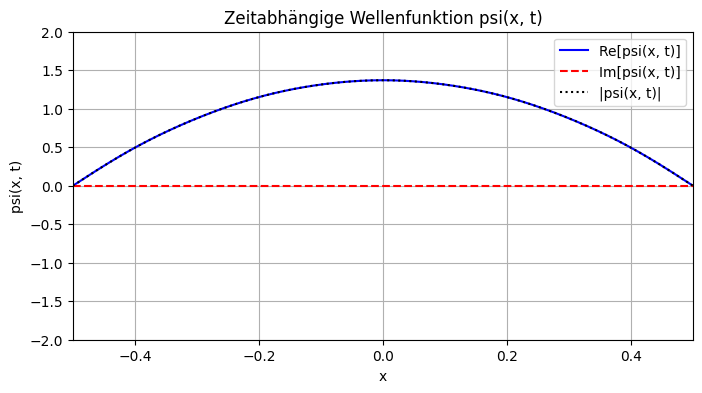

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
L = 1
hbar = 1
m = 1

# Spatial grid
x = np.linspace(-L/2, L/2, 500)

# Basis functions and energies (only odd n)
def phi_n(n, x):
    return np.sqrt(2/L) * np.cos(n * np.pi * x / L)

def E_n(n):
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

# Coefficients c_n
def c_n(n):
    return (8 * np.sqrt(15)) / (n**3 * np.pi**3) * np.sin(n * np.pi / 2)

# Time-dependent wavefunction ψ(x, t)
def psi_xt(x, t, N_terms=5):
    psi = np.zeros_like(x, dtype=complex)
    for n in range(1, 2*N_terms, 2):  # odd n: 1, 3, 5, ...
        psi += c_n(n) * phi_n(n, x) * np.exp(-1j * E_n(n) * t / hbar)
    return psi

# Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))
line_real, = ax.plot([], [], label='Re[psi(x, t)]', color='blue')
line_imag, = ax.plot([], [], label='Im[psi(x, t)]', color='red', linestyle='--')
line_abs, = ax.plot([], [], label='|psi(x, t)|', color='black', linestyle=':')
ax.set_xlim(-L/2, L/2)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('psi(x, t)')
ax.set_title('Zeitabhängige Wellenfunktion psi(x, t)')
ax.legend()
ax.grid(True)

# Animation function
def animate(i):
    t = i * 0.1
    psi = psi_xt(x, t, N_terms=5)
    line_real.set_data(x, psi.real)
    line_imag.set_data(x, psi.imag)
    line_abs.set_data(x, np.abs(psi))
    return line_real, line_imag, line_abs

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
#plt.close()  # Prevent static image display
ani
